In [1]:
from pycaret.classification import *

In [2]:
US_df = pd.read_csv('./MACH_data/cut_off_by_avg_US.csv')
US_df

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,Q4I,Q4E_ppl_good,Q5_VP_ppl_bad,Q5I,Q5E_ppl_bad,Q6_TN_hnsty_best,Q6I,Q6E_hnsty_best,Q7_TN_lying_bad,Q7I,Q7E_lying_bad,Q8_VP_ppl_lazy,Q8I,Q8E_ppl_lazy,Q9_MN_humble_hnst,Q9I,Q9E_humble_hnst,Q10_TN_hnstly_ask,Q10I,Q10E_hnstly_ask,Q11_VN_leader_clean,Q11I,Q11E_leader_clean,Q12_TP_trust_trouble,Q12I,Q12E_trust_trouble,Q13_VP_ppl_criminal,Q13I,Q13E_ppl_criminal,Q14_VN_ppl_brave,Q14I,Q14E_ppl_brave,Q15_TP_abu_good,Q15I,Q15E_abu_good,Q16_TN_ppl_good,Q16I,Q16E_ppl_good,Q17_VN_ppl_notbad,Q17I,Q17E_ppl_notbad,Q18_VP_komsu_better,Q18I,Q18E_komsu_better,Q19_MP_anrocksa_ok,Q19I,Q19E_anrocksa_ok,Q20_VP_money_good,Q20I,Q20E_money_good,country,introelapse,testelapse,surveyelapse,TYP_out,TYP_fight,TYP_depnd,TYP_anx,TYP_try,TYP_quiet,TYP_warm,TYP_disorg,TYP_calm,TYP_stable,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6_F,VCL7,VCL8,VCL9_F,VCL10,VCL11,VCL12_F,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screenw,screenh,hand,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,15.0,6.0,5.0,1.0,7.0,1.0,8.0,3.0,1.0,5.0,11.0,4.0,2.0,5.0,2.0,13.0,16.0,1.0,6.0,9.0,1.0,20.0,4.0,5.0,14.0,3.0,5.0,4.0,6.0,2.0,10.0,6.0,5.0,3.0,4.0,1.0,19.0,5.0,2.0,7.0,8.0,4.0,12.0,4.0,5.0,11.0,14.0,3.0,18.0,13.0,US,38.0,143.0,150,2,5,6,2,4,6,5,4,6,5,know,know,know,know,know,n_know,n_know,know,n_know,know,n_know,n_know,know,know,know,know,High school,Suburban,Male,Yes,18,1536.0,864.0,Right,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,4.0,3.0,5.0,9.0,6.0,1.0,15.0,2.0,1.0,1.0,4.0,5.0,17.0,5.0,1.0,11.0,4.0,1.0,20.0,11.0,1.0,6.0,7.0,5.0,18.0,3.0,5.0,19.0,5.0,1.0,7.0,4.0,5.0,3.0,4.0,1.0,13.0,3.0,1.0,10.0,32.0,5.0,8.0,3.0,5.0,5.0,4.0,3.0,14.0,8.0,US,4.0,143.0,157,1,7,6,7,5,7,1,4,1,4,know,know,know,know,know,know,n_know,know,know,know,know,know,know,know,know,know,Less than high school,Rural,Female,Yes,15,375.0,667.0,Right,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
2,4.0,4.0,9.0,3.0,5.0,6.0,5.0,15.0,18.0,3.0,3.0,10.0,4.0,9.0,10.0,3.0,8.0,4.0,3.0,11.0,11.0,3.0,20.0,6.0,2.0,7.0,13.0,2.0,12.0,31.0,1.0,18.0,9.0,4.0,6.0,22.0,4.0,16.0,13.0,1.0,10.0,5.0,5.0,19.0,3.0,1.0,13.0,6.0,1.0,14.0,19.0,5.0,1.0,16.0,4.0,17.0,10.0,2.0,2.0,23.0,US,3.0,244.0,158,2,4,6,2,3,7,5,2,7,1,know,know,know,know,n_know,n_know,n_know,n_know,know,know,n_know,n_know,n_know,know,know,know,Less than high school,Rural,Male,No,17,1366.0,768.0,Right,Agnostic,Heterosexual,Other,No,Never married,3,76.0,36.0,32.0,8.0
3,2.0,16.0,5.0,4.0,11.0,5.0,4.0,6.0,9.0,4.0,20.0,11206.0,2.0,10.0,6.0,4.0,13.0,3.0,2.0,19.0,2.0,4.0,18.0,5.0,5.0,8.0,10.0,4.0,7.0,8.0,1.0,12.0,4.0,2.0,2.0,12.0,1.0,14.0,11.0,1.0,3.0,6.0,4.0,9.0,3.0,1.0,15.0,3.0,3.0,4.0,8.0,4.0,1.0,8.0,5.0,5.0,4.0,1.0,17.0,5.0,US,12.0,11322.0,730,4,3,6,7,7,5,3,5,4,4,know,know,know,know,know,n_know,n_know,n_know,n_know,know,n_know,n_know,know,know,know,know,Graduate degree,Rural,Female,Yes,32,375.0,667.0,Right,Atheist,Heterosexual,White,Yes,Previously married,3,60.0,27.0,27.0,6.0
4,4.0,14.0,10.0,1.0,5.0,6.0,4.0,8.0,8.0,1.0,3.0,6.0,4.0,2.0,13.0,5.0,7.0,6.0,5.0,13.0,7.0,3.0,17.0,8.0,5.0,1.0,15.0,3.0,19.0,10.0,1.0,9.0,5.0,4.0,20.0,6.0,2.0,6.0,11.0,1.0,10.0,4.0,1.0,4.0,12.0,4.0,11.0,6.0,1.0,16.0,7.0,4.0,18.0,8.0,5.0,12.0,7.0,1.0,15.0,12.0,US,4.0,169.0,222,7,6,6,1,7,1,6,4,6,2,know,know,n_know,know,know,know,n_know,n_know,n_know,know,know,know,know,know,know,know,High school,Urban,Male,No,37,1536.0,864.0,Right,Agnostic,Heterosexual,Other,No,Currently married,3,59.0,34.0,19.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [4]:
US_clf = setup(US_df, target='voted')

,Description,Value
0,session_id,4582
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(23686, 108)"
5,Missing Values,False
6,Numeric Features,70
7,Categorical Features,37
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
US_best_clf = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7337,0.8075,0.7413,0.7546,0.7316,0.4742,0.4903,1.5790
catboost,CatBoost Classifier,0.7329,0.8058,0.7394,0.7494,0.7315,0.4714,0.4837,14.1520
ada,Ada Boost Classifier,0.7275,0.8041,0.7340,0.7439,0.7261,0.4608,0.4729,0.3370
lightgbm,Light Gradient Boosting Machine,0.7245,0.8022,0.7312,0.7415,0.7230,0.4552,0.4677,0.1870
rf,Random Forest Classifier,0.7248,0.7980,0.7301,0.7369,0.7241,0.4543,0.4628,0.6780
lda,Linear Discriminant Analysis,0.7207,0.7943,0.7210,0.7222,0.7210,0.4406,0.4412,0.2310
et,Extra Trees Classifier,0.7211,0.7916,0.7229,0.7248,0.7213,0.4431,0.4451,0.9170
xgboost,Extreme Gradient Boosting,0.7101,0.7868,0.7138,0.7176,0.7100,0.4233,0.4279,2.8630
lr,Logistic Regression,0.6715,0.7493,0.6639,0.6732,0.6667,0.3318,0.3375,3.2470
nb,Naive Bayes,0.5027,0.6750,0.5302,0.5519,0.3924,0.0586,0.0746,0.1290


In [13]:
# best 1 모델만 생성 후 튜닝

In [10]:
US_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0.8129,0.7380,0.7491,0.7302,0.4697,0.4830
1,0.7289,0.8080,0.7348,0.7459,0.7270,0.4633,0.4765
2,0.7358,0.8065,0.7410,0.7499,0.7345,0.4763,0.4871
3,0.7389,0.8222,0.7447,0.7551,0.7373,0.4829,0.4956
4,0.7385,0.8033,0.7449,0.7582,0.7362,0.4828,0.4985
5,0.7408,0.8205,0.7468,0.7583,0.7389,0.4869,0.5007
6,0.7315,0.8051,0.7382,0.7521,0.7290,0.4693,0.4857
7,0.7283,0.8004,0.7343,0.7454,0.7264,0.4622,0.4755
8,0.7417,0.8114,0.7479,0.7601,0.7397,0.4888,0.5035
9,0.7385,0.8173,0.7448,0.7578,0.7362,0.4826,0.4981


In [ ]:
# 학습률 변경 후 확인.

In [12]:
US_gbc = [create_model('gbc', learning_rate=i) 
          for i in np.arange(0.1, 1, 0.1)]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7026,0.7800,0.7045,0.7063,0.7027,0.4067,0.4086
1,0.7022,0.7840,0.7038,0.7055,0.7023,0.4055,0.4072
2,0.6957,0.7749,0.6968,0.6981,0.6959,0.3920,0.3931
3,0.7089,0.7833,0.7107,0.7124,0.7091,0.4191,0.4210
4,0.6933,0.7709,0.6955,0.6978,0.6933,0.3885,0.3910
5,0.7126,0.7928,0.7147,0.7166,0.7127,0.4268,0.4290
6,0.6997,0.7747,0.7022,0.7046,0.6997,0.4016,0.4044
7,0.6951,0.7697,0.6971,0.6990,0.6952,0.3918,0.3938
8,0.7099,0.7771,0.7121,0.7144,0.7099,0.4215,0.4242
9,0.7062,0.7811,0.7088,0.7116,0.7061,0.4147,0.4180


In [14]:
# 학습률은 높아질수록 더 않좋아짐

In [15]:
# 학습률 중 AUC 높은 값으로 설정 후 다시 모델 생성 

In [16]:
US_gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0.8129,0.7380,0.7491,0.7302,0.4697,0.4830
1,0.7289,0.8080,0.7348,0.7459,0.7270,0.4633,0.4765
2,0.7358,0.8065,0.7410,0.7499,0.7345,0.4763,0.4871
3,0.7389,0.8222,0.7447,0.7551,0.7373,0.4829,0.4956
4,0.7385,0.8033,0.7449,0.7582,0.7362,0.4828,0.4985
5,0.7408,0.8205,0.7468,0.7583,0.7389,0.4869,0.5007
6,0.7315,0.8051,0.7382,0.7521,0.7290,0.4693,0.4857
7,0.7283,0.8004,0.7343,0.7454,0.7264,0.4622,0.4755
8,0.7417,0.8114,0.7479,0.7601,0.7397,0.4888,0.5035
9,0.7385,0.8173,0.7448,0.7578,0.7362,0.4826,0.4981


In [ ]:
# 튜닝을 한게 더 안좋음...

In [18]:
US_tuned_gbc = tune_model(US_gbc, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7225,0.8026,0.7269,0.7333,0.7215,0.4490,0.4569
1,0.7243,0.8048,0.7287,0.7350,0.7234,0.4526,0.4604
2,0.7275,0.8030,0.7313,0.7362,0.7270,0.4583,0.4645
3,0.7463,0.8234,0.7514,0.7597,0.7452,0.4969,0.5072
4,0.7260,0.8028,0.7315,0.7410,0.7244,0.4572,0.4686
5,0.7362,0.8149,0.7417,0.7515,0.7346,0.4773,0.4892
6,0.7265,0.8079,0.7328,0.7453,0.7242,0.4590,0.4737
7,0.7256,0.7989,0.7307,0.7389,0.7243,0.4558,0.4658
8,0.7357,0.8084,0.7408,0.7491,0.7345,0.4759,0.4861
9,0.7265,0.8158,0.7320,0.7416,0.7248,0.4581,0.4696


In [ ]:
# best 3가지 모델 뽑아보아서 튜닝해보기 

In [19]:
US_clf_best3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7355,0.8107,0.7415,0.7532,0.7335,0.4765,0.4904,17.7240
catboost,CatBoost Classifier,0.7304,0.8092,0.7357,0.7445,0.7290,0.4656,0.4763,36.3710
lightgbm,Light Gradient Boosting Machine,0.7315,0.8066,0.7371,0.7471,0.7299,0.4682,0.4802,1.3520
ada,Ada Boost Classifier,0.7289,0.8039,0.7342,0.7431,0.7274,0.4626,0.4734,4.6180
rf,Random Forest Classifier,0.7233,0.7988,0.7272,0.7322,0.7228,0.4501,0.4563,4.1800
lda,Linear Discriminant Analysis,0.7213,0.7963,0.7217,0.7226,0.7215,0.4422,0.4428,1.5120
et,Extra Trees Classifier,0.7177,0.7915,0.7191,0.7206,0.7178,0.4362,0.4377,5.1650
lr,Logistic Regression,0.6706,0.7406,0.6647,0.6724,0.6666,0.3325,0.3375,6.3240
nb,Naive Bayes,0.4806,0.6884,0.5077,0.5347,0.3378,0.0147,0.0288,0.1770
dt,Decision Tree Classifier,0.6540,0.6528,0.6528,0.6540,0.6539,0.3056,0.3057,0.9970


In [20]:
US_tuned_best3 = [tune_model(i) for i in US_clf_best3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0.8047,0.7370,0.7448,0.7310,0.4686,0.4781
1,0.7284,0.8053,0.7332,0.7404,0.7274,0.4611,0.4700
2,0.7284,0.8024,0.7326,0.7384,0.7277,0.4606,0.4678
3,0.7472,0.8168,0.7515,0.7575,0.7466,0.4979,0.5056
4,0.7371,0.8019,0.7428,0.7532,0.7354,0.4793,0.4919
5,0.7408,0.8083,0.7454,0.7525,0.7399,0.4855,0.4944
6,0.7292,0.7950,0.7343,0.7423,0.7280,0.4630,0.4728
7,0.7200,0.7877,0.7252,0.7336,0.7186,0.4450,0.4551
8,0.7394,0.8087,0.7444,0.7525,0.7383,0.4831,0.4931
9,0.7339,0.8094,0.7385,0.7457,0.7328,0.4718,0.4807


In [40]:
US_gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=920, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

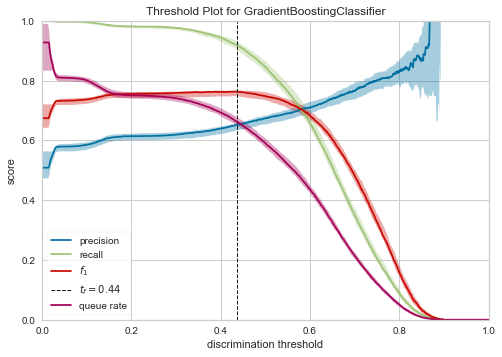

In [44]:
plot_model(US_gbc, plot='threshold')

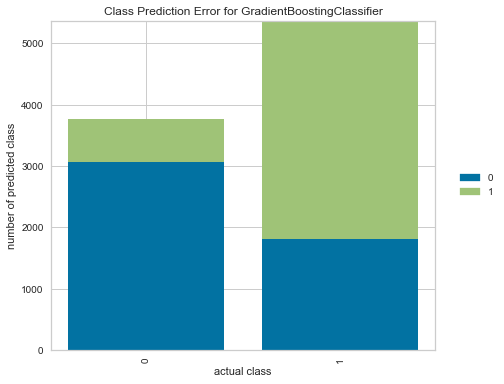

In [45]:
plot_model(US_gbc, plot='error')

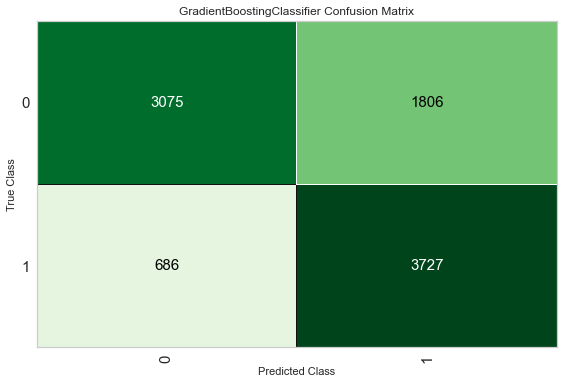

In [46]:
plot_model(US_gbc, plot='confusion_matrix')

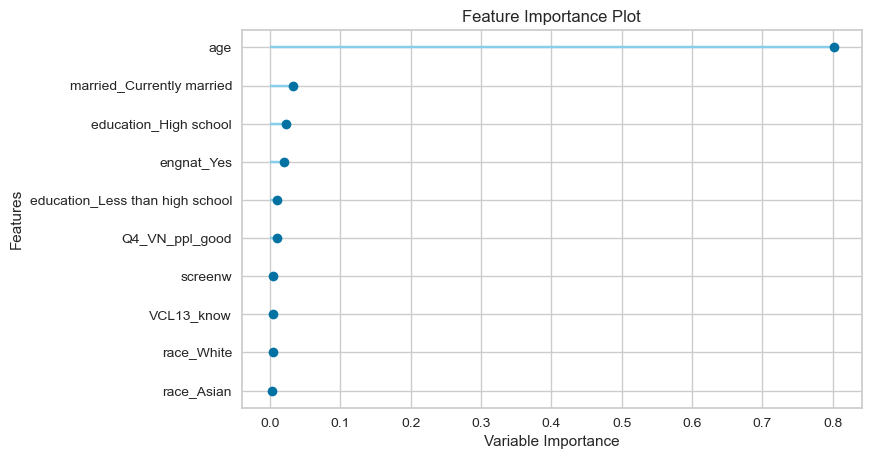

In [42]:
plot_model(US_gbc, plot='feature')

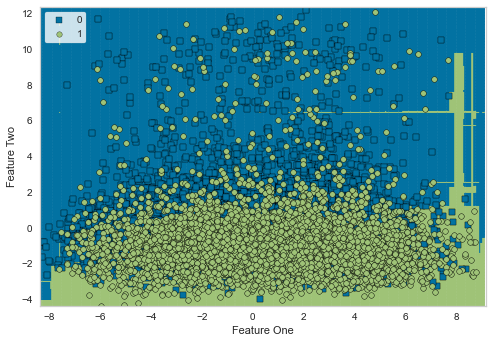

In [48]:
plot_model(US_gbc, plot='boundary')

In [49]:
plot_model(US_gbc, plot='parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,deviance
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_impurity_split,None


In [21]:
US_clf_best3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=920, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31

In [50]:
US_tuned_best3[0]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.322, loss='deviance', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.1, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=170,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=920, subsample=0.85, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)